In [2]:
# Library yang digunakan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Membaca file JSON untuk dijadikan dataframe
file_path = r'C:\Users\Haidar\OneDrive - Institut Teknologi Bandung\Desktop\github\Seleksi-2023-Tugas-1\Data Scraping\data\raywhite_merged.json'
df = pd.read_json(file_path)

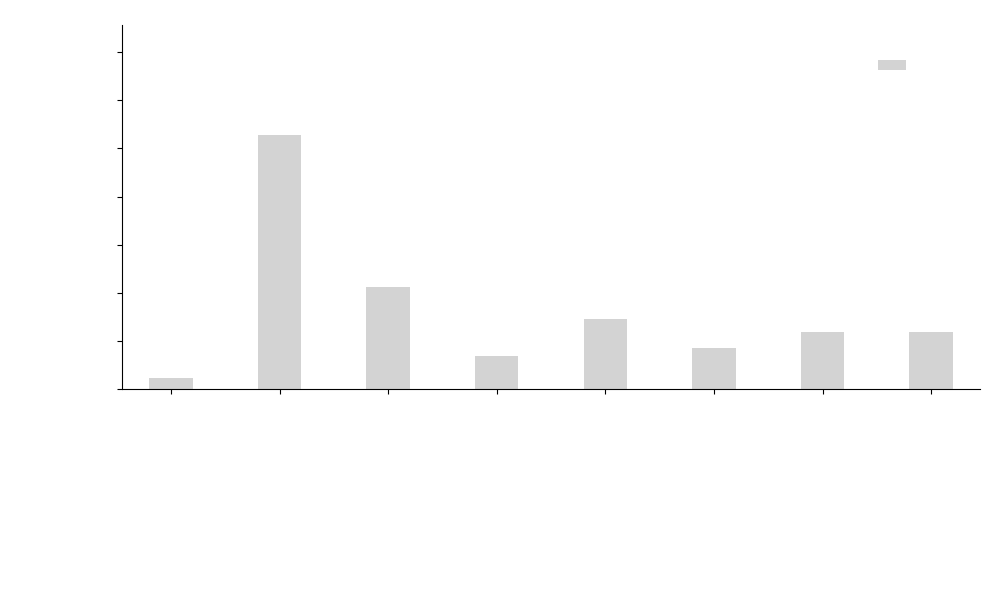

In [3]:
# Mean dan median harga dari setiap tipe properti

overview_stats = df.groupby('type').agg({
    'value_usd': ['mean', 'median']
})

plt.figure(figsize=(10, 6), facecolor='None')
mean = overview_stats['value_usd']['mean'].plot(kind='bar', color='white', width=0.4)
median = overview_stats['value_usd']['median'].plot(kind='bar', color='lightgrey', width=0.4)
plt.xlabel('Property Type', fontsize=20, fontweight='bold', color='white')
plt.ylabel('Price (USD)', fontsize=20, fontweight='bold', color='white')
plt.xticks(rotation=45, ha='right', fontsize=20, fontweight='bold', color='white')
plt.yticks(fontsize=20, fontweight='bold', color='white')
plt.legend(['Mean', 'Median'], loc='upper right', frameon=False, facecolor='None', edgecolor='None')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().set_facecolor('None')
mean.get_legend().get_texts()[0].set_color('white')
mean.get_legend().get_texts()[1].set_color('white')
mean.ticklabel_format(style='sci', scilimits=(-3, 4), axis='y')
mean.yaxis.get_offset_text().set_color('white')

plt.tight_layout()
plt.show()

In [62]:
# 10 nama agen dengan jumlah listing terbanyak

realtor = df.groupby(['realtor_id', 'realtor']).agg({
    'listing_id': 'count',
    'value_usd': 'sum'
})
top_realtor = realtor.nlargest(10, 'listing_id')
print(top_realtor)

                                            listing_id  value_usd
realtor_id realtor                                               
25452      SENTOSA LIE                             250   99833670
25753      Henry Soerya                            228   56725390
20901      Mei Ray White                           194   56154798
933        Ellyta Admin                            172   53610810
15716      Saiful Anwar                            133   36408863
26269      Yoki Heriyanto, S.E                     130   42004147
26300      Alfian .                                121   22753330
26322      Amoria Badar                            117   27015519
26628      Vanro Aritonang, S. Kom (Vanro)         109   22663552
26345      Rahel RWKG                               99   31010305


In [22]:
# 10 nama kantor dengan jumlah listing terbanyak

office = df.groupby('realtor_office').agg({
    'listing_id': 'count',
    'value_usd': 'sum'
})

top_office = office.nlargest(10, 'listing_id')
print(top_office)

                                    listing_id  value_usd
realtor_office                                           
Ray White Bintaro Trade Center            1238  285495403
Ray White Lampung Morotai                  930  199741224
Ray White Kelapa Gading                    681  233007966
Ray White Bintaro Jaya III                 516  138826650
Ray White Prioritas Sutami                 433  115008439
Ray White Darmo Permai                     432  106051614
Ray White Emerald Avenue Bintaro           408  101209348
Ray White Priority Menteng Bintaro         367  103031778
Ray White North West Citraland             359  145630517
Ray White Bsd City                         278   55574352


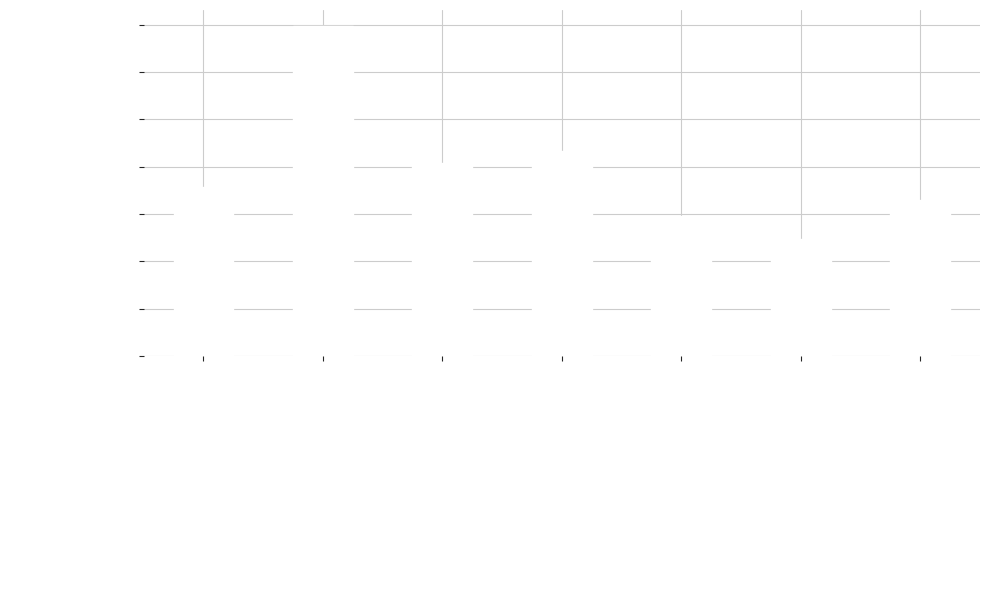

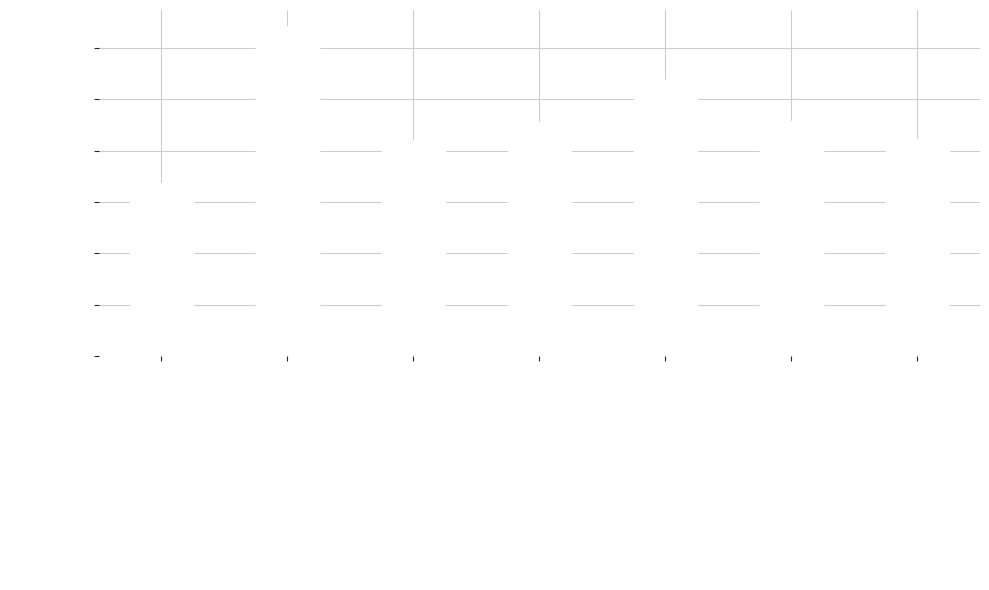

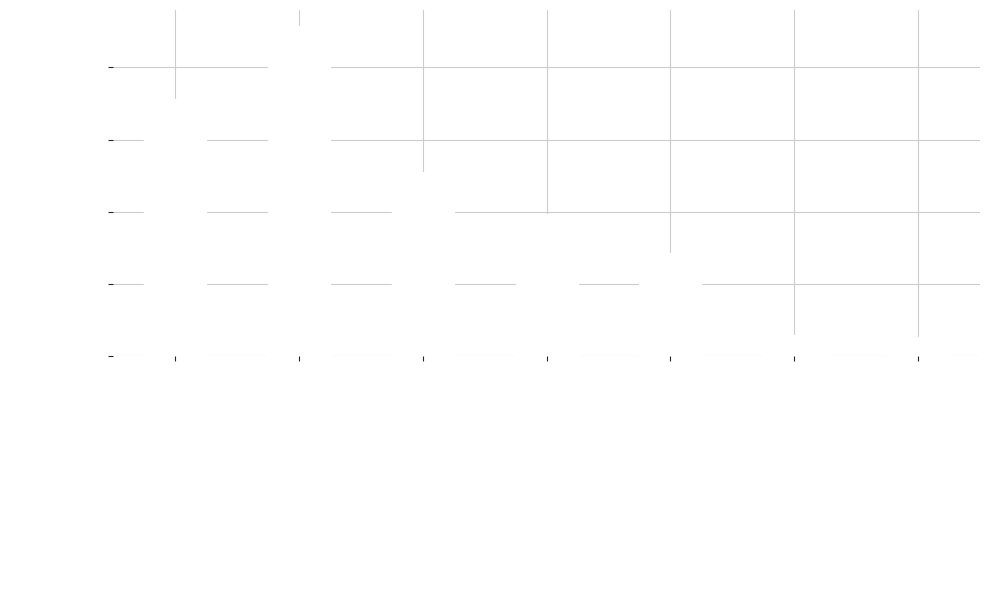

In [2]:
house = df[df['type'] == 'house']
province = house.groupby('province').agg({
    'value_usd': 'mean',
    'building_size': 'mean',
    'listing_id': 'count'
})
province_fixed = province[province['listing_id'] >= 100]
sns.set_style('whitegrid')
sns.set_palette('pastel')
font = {'fontweight': 'bold', 'color': 'white'}


# Mean harga rumah dari setiap provinsi
plt.figure(facecolor='None')
province_fixed['value_usd'].plot(kind='bar', figsize=(10, 6), color='white')
plt.xlabel('Province', fontsize=20, **font)
plt.ylabel('Average Price (USD)', fontsize=20, **font)
plt.xticks(rotation=45, ha='right', fontsize=20, **font)
plt.yticks(fontsize=20, **font)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.gca().set_facecolor('None')
plt.tight_layout()
plt.show()

# Mean ukuran rumah dari setiap provinsi
plt.figure(facecolor='None')
province_fixed['building_size'].plot(kind='bar', figsize=(10, 6), color='white')
plt.xlabel('Province', fontsize=20, **font)
plt.ylabel('Average Building Size (m²)', fontsize=20, **font)
plt.xticks(rotation=45, ha='right', fontsize=20, **font)
plt.yticks(fontsize=20, **font)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.gca().set_facecolor('None')
plt.tight_layout()
plt.show()

# Jumlah listing rumah dari setiap provinsi
plt.figure(facecolor='None')
province_fixed['listing_id'].plot(kind='bar', figsize=(10, 6), color='white')
plt.xlabel('Province', fontsize=20, **font)
plt.ylabel('Number of Listings', fontsize=20, **font)
plt.xticks(rotation=45, ha='right', fontsize=20, **font)
plt.yticks(fontsize=20, **font)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.gca().set_facecolor('None')
plt.tight_layout()
plt.show()


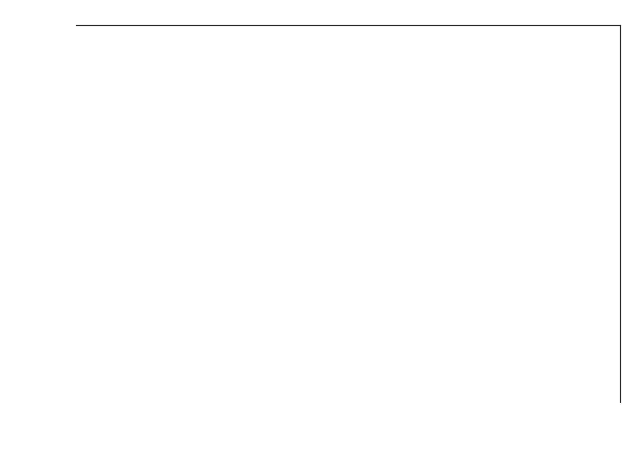

In [55]:
# Distribusi listing rumah terhadap harga jualnya dalam USD

house_data = df[df['type'] == 'house']
house_values = house_data['value_usd']

sns.set_style('white')
sns.kdeplot(house_values, color='white', linewidth=5, alpha=0.7)
plt.xlabel('Price (USD)', fontsize=14, labelpad=8, fontweight='bold', color='white')
plt.ylabel('Number of Listings', fontsize=14, labelpad=8, fontweight='bold', color='white')
ax = plt.gca()
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.tick_params(axis='x', colors='white', labelsize=14) 
ax.tick_params(axis='y', colors='white', labelsize=14) 

ax.set_facecolor('None')
plt.gcf().set_facecolor('None')
plt.tight_layout()
plt.show()